In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

# READING DATA

In [6]:
data = pd.read_csv("pizza_v2.csv")

In [7]:
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price_rupiah     129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


# preprocessing

In [9]:
data['price_rupiah'] = data['price_rupiah'].str.replace('Rp', '').str.replace(',', '').astype('float64') # Removing Rp 
data['diameter'] = data['diameter'].str.replace('inch', '').str.replace(',', '').astype('float64') # Removing Inch
#Checking
data.loc[:, ['price_rupiah', 'diameter']]

,price_rupiah,diameter
0,235000.0,22.0
1,198000.0,20.0
2,120000.0,16.0
3,155000.0,14.0
4,248000.0,18.0
...,...,...
124,39000.0,8.5
125,72000.0,12.0
126,99000.0,14.0
127,44000.0,8.5


In [10]:
data.isnull().sum().sort_values(ascending=True)

company            0
price_rupiah       0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

we have no null values

In [11]:
#checking
data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235000.0,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198000.0,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120000.0,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155000.0,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248000.0,18.0,mozzarella,double_signature,jumbo,yes,no,yes


# EDA

Data Correlation

In [12]:
columns = ['company', 'topping', 'variant', 'size', 'extra_sauce', 'extra_cheese', 'extra_mushrooms']

le_list = {}

for column in columns:
    encoder = LabelEncoder()
    le_list[column] = encoder
    data[column] = encoder.fit_transform(data[column])

data.head()

,company,price_rupiah,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,0,235000.0,22.0,2,8,1,1,1,0
1,0,198000.0,20.0,7,8,1,1,1,0
2,0,120000.0,16.0,5,8,4,1,1,1
3,0,155000.0,14.0,9,8,4,1,0,1
4,0,248000.0,18.0,4,8,1,1,0,1


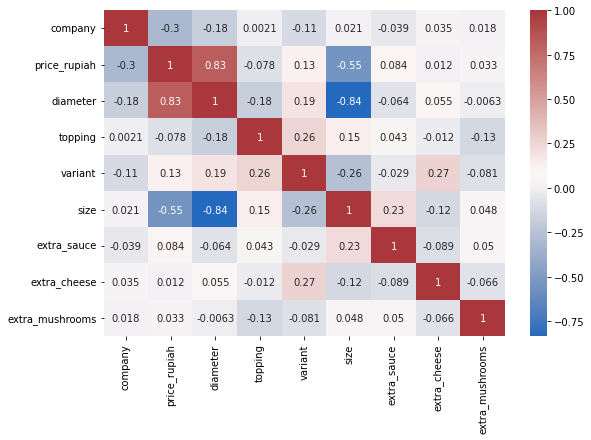

In [13]:
plt.figure(figsize=(9, 6))
sns.heatmap(data.corr(),cmap= "vlag", annot=True)
plt.show()

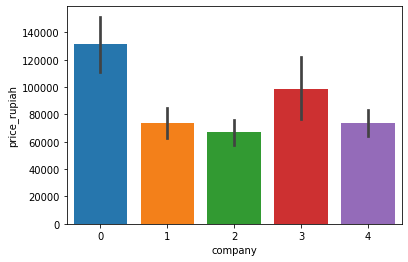

In [14]:
sns.barplot(x = 'company', y = 'price_rupiah', data = data,  saturation=0.90)

In [15]:
fig =  px.pie (data, names = "size", hole = 0.4, template = "gridon")
fig.show()

In [16]:
fig = px.pie (data, names = "company", hole = 0.4, template = "gridon")
fig.show ()

In [17]:
fig =  px.pie (data, names = "variant", hole = 0.4, template = "gridon")
fig.show ()

In [18]:
fig = px.pie (data, names = "topping", hole = 0.4, template = "gridon")
fig.show()

In [19]:
fig = px.pie (data, names = "extra_cheese", hole = 0.4, template = "gridon")
fig.show()

In [20]:
fig = px.pie (data, names = "extra_mushrooms", hole = 0.4, template = "gridon")
fig.show()

In [21]:
fig = px.pie (data, names = "extra_sauce", hole = 0.4, template = "gridon")
fig.show()

# SPLITTING THE DATASET INTO TRAIN AND TEST DATA

In [22]:
data.columns

Index(['company', 'price_rupiah', 'diameter', 'topping', 'variant', 'size',
       'extra_sauce', 'extra_cheese', 'extra_mushrooms'],
      dtype='object')

In [23]:
y = data["price_rupiah"]
x = data.drop("price_rupiah",axis = 1)

In [24]:
# Splitting the dataset into train and test datasets
# 80% Train Data + 20% Test Data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 12)

# Modeling

Models:
- Decision tree
- RandomForest
- XGBoost

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

1.xgboost

In [26]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as metrics

# Define the model
model = XGBRegressor(n_estimators=1000, learning_rate=0.09) 

# Fit the model
model.fit(x_train, y_train) 

# Get predictions
predictions = model.predict(x_test) 

print('Testing R2 Score: ', r2_score(y_test, predictions)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, predictions)))
print('Testing MAE: ', mean_absolute_error(y_test, predictions))
print('Testing MSE: ', mean_squared_error(y_test, predictions))

[05:06:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Testing R2 Score:  98.00910132914838
Testing RMSE:  6073.510606097693
Testing MAE:  4693.439678485577
Testing MSE:  36887531.082381174


2.Decision Tree Regressor

In [27]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [28]:
model_dt = DecisionTreeRegressor(random_state=12)
model_dt.fit(x_train,y_train)
pred_dt = model_dt.predict(x_test)
print('Testing R2 Score: ', r2_score(y_test, pred_dt)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_dt)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_dt))
print('Testing MSE: ', mean_squared_error(y_test, pred_dt))

Testing R2 Score:  96.23648176753939
Testing RMSE:  8350.495148838136
Testing MAE:  3807.6923076923076
Testing MSE:  69730769.23076923


3.Random forest regressor

In [29]:
from sklearn.ensemble import  RandomForestRegressor

model_rf= RandomForestRegressor(n_estimators=100)
model_rf.fit(x_train, y_train)
pred_rf= model_rf.predict(x_test)

In [30]:
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(x_train, y_train)
pred_rf = model_rf.predict(x_test)
print('Testing R2 Score: ', r2_score(y_test, pred_rf)*100)
print('Testing RMSE: ', np.sqrt(mean_squared_error(y_test, pred_rf)))
print('Testing MAE: ', mean_absolute_error(y_test, pred_rf))
print('Testing MSE: ', mean_squared_error(y_test, pred_rf))

Testing R2 Score:  95.69195221230848
Testing RMSE:  8934.195919654394
Testing MAE:  7428.653846153846
Testing MSE:  79819856.73076923
